In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import TensorFlow and relevant Keras classes to setup the model
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
import tensorflow_datasets as tfds
pcam, pcam_info = tfds.load("patch_camelyon", with_info=True)
print(pcam_info)

tfds.core.DatasetInfo(
    name='patch_camelyon',
    full_name='patch_camelyon/2.0.0',
    description="""
    The PatchCamelyon benchmark is a new and challenging image classification
    dataset. It consists of 327.680 color images (96 x 96px) extracted from
    histopathologic scans of lymph node sections. Each image is annoted with a
    binary label indicating presence of metastatic tissue. PCam provides a new
    benchmark for machine learning models: bigger than CIFAR10, smaller than
    Imagenet, trainable on a single GPU.
    """,
    homepage='https://patchcamelyon.grand-challenge.org/',
    data_path='/Users/melody.zhao/tensorflow_datasets/patch_camelyon/2.0.0',
    download_size=7.48 GiB,
    dataset_size=7.06 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(96, 96, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disabl

2021-12-06 00:32:48.822253: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
pcam

{'test': <PrefetchDataset shapes: {id: (), image: (96, 96, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>,
 'train': <PrefetchDataset shapes: {id: (), image: (96, 96, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>,
 'validation': <PrefetchDataset shapes: {id: (), image: (96, 96, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>}

In [4]:
pcam['train']

<PrefetchDataset shapes: {id: (), image: (96, 96, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>

In [5]:
pcam_list = list(pcam['train'])

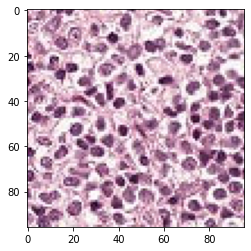

In [6]:
plt.imshow(pcam_list[0]['image'])

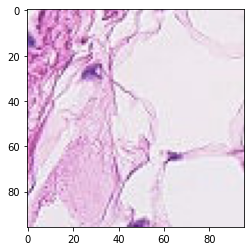

In [7]:
plt.imshow(pcam_list[1]['image'])

In [8]:
pcam_list[0]['image'].shape

TensorShape([96, 96, 3])

In [9]:
pcam_list[0]['image'].numpy()

array([[[247, 206, 222],
        [236, 197, 216],
        [223, 185, 208],
        ...,
        [252, 213, 232],
        [228, 187, 205],
        [250, 209, 227]],

       [[169, 122, 140],
        [255, 239, 255],
        [204, 160, 185],
        ...,
        [230, 191, 210],
        [210, 171, 190],
        [215, 176, 195]],

       [[206, 153, 173],
        [218, 166, 188],
        [227, 179, 203],
        ...,
        [176, 139, 157],
        [132,  93, 114],
        [158, 119, 140]],

       ...,

       [[199, 156, 186],
        [164, 124, 150],
        [175, 135, 159],
        ...,
        [255, 243, 238],
        [233, 213, 212],
        [255, 246, 245]],

       [[214, 180, 204],
        [177, 146, 164],
        [255, 230, 246],
        ...,
        [249, 238, 236],
        [255, 250, 251],
        [205, 189, 190]],

       [[194, 170, 186],
        [255, 237, 251],
        [225, 202, 212],
        ...,
        [250, 237, 246],
        [255, 247, 255],
        [222, 206, 217]]

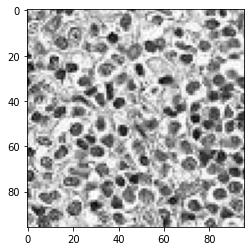

In [10]:
import numpy as np
from PIL import Image
import cv2

gr_im= Image.fromarray(pcam_list[0]['image'].numpy())
img_gray = cv2.cvtColor(pcam_list[0]['image'].numpy(), cv2.COLOR_RGB2BGR)
img_gray = cv2.cvtColor(pcam_list[0]['image'].numpy(), cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,  cmap = plt.cm.gray)

In [8]:
# Sobel Edge Detection
# Sobel Edge Detection
import cv2

img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection


# Display Sobel Edge Detection Images
# cv2.imshow('Sobel X', sobelx)
# cv2.imshow('Sobel Y', sobely)
# cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
Hori = np.concatenate((sobelx, sobelx, sobelxy), axis=1)
plt.imshow(Hori, cmap = plt.cm.gray)


# cv2.imshow('HORIZONTAL', Hori)
# cv2.waitKey(0)
# cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
# cv2.waitKey(0)

NameError: name 'img_gray' is not defined

In [9]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.imshow(edges,  cmap = plt.cm.gray)


NameError: name 'img_blur' is not defined

# Style Transfer

In [13]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [14]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [15]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [16]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

In [17]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  print(long_dim)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [18]:
def preprocess_content(img):
    max_dim = 512
#     img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    print(long_dim)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [19]:
img = preprocess_content(pcam_list[0]['image'])

tf.Tensor(96.0, shape=(), dtype=float32)


In [20]:
print(img)

tf.Tensor(
[[[[0.9686275  0.8078432  0.8705883 ]
   [0.9686275  0.8078432  0.8705883 ]
   [0.9686275  0.8078432  0.8705883 ]
   ...
   [0.9803922  0.8196079  0.89019614]
   [0.9803922  0.8196079  0.89019614]
   [0.9803922  0.8196079  0.89019614]]

  [[0.9686275  0.8078432  0.8705883 ]
   [0.9686275  0.8078432  0.8705883 ]
   [0.9686275  0.8078432  0.8705883 ]
   ...
   [0.9803922  0.8196079  0.89019614]
   [0.9803922  0.8196079  0.89019614]
   [0.9803922  0.8196079  0.89019614]]

  [[0.9686275  0.8078432  0.8705883 ]
   [0.9686275  0.8078432  0.8705883 ]
   [0.9686275  0.8078432  0.8705883 ]
   ...
   [0.9803922  0.8196079  0.89019614]
   [0.9803922  0.8196079  0.89019614]
   [0.9803922  0.8196079  0.89019614]]

  ...

  [[0.7607844  0.6666667  0.7294118 ]
   [0.7607844  0.6666667  0.7294118 ]
   [0.7607844  0.6666667  0.7294118 ]
   ...
   [0.8705883  0.8078432  0.85098046]
   [0.8705883  0.8078432  0.85098046]
   [0.8705883  0.8078432  0.85098046]]

  [[0.7607844  0.6666667  0.729411

In [21]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

tf.Tensor(700.0, shape=(), dtype=float32)
tf.Tensor(1000.0, shape=(), dtype=float32)


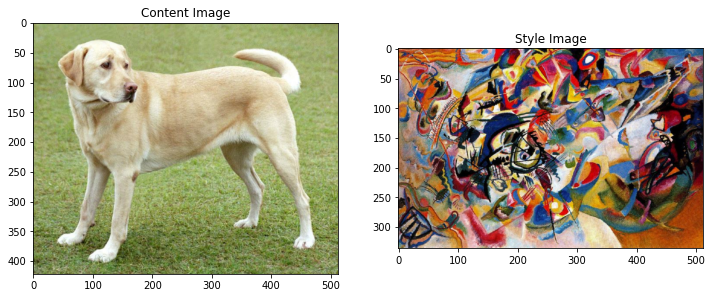

In [22]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

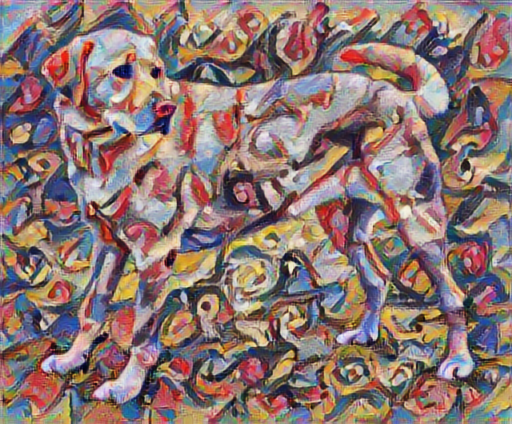

In [23]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

tf.Tensor(
[[[[0.9686275  0.8078432  0.8705883 ]
   [0.9686275  0.8078432  0.8705883 ]
   [0.9686275  0.8078432  0.8705883 ]
   ...
   [0.9803922  0.8196079  0.89019614]
   [0.9803922  0.8196079  0.89019614]
   [0.9803922  0.8196079  0.89019614]]

  [[0.9686275  0.8078432  0.8705883 ]
   [0.9686275  0.8078432  0.8705883 ]
   [0.9686275  0.8078432  0.8705883 ]
   ...
   [0.9803922  0.8196079  0.89019614]
   [0.9803922  0.8196079  0.89019614]
   [0.9803922  0.8196079  0.89019614]]

  [[0.9686275  0.8078432  0.8705883 ]
   [0.9686275  0.8078432  0.8705883 ]
   [0.9686275  0.8078432  0.8705883 ]
   ...
   [0.9803922  0.8196079  0.89019614]
   [0.9803922  0.8196079  0.89019614]
   [0.9803922  0.8196079  0.89019614]]

  ...

  [[0.7607844  0.6666667  0.7294118 ]
   [0.7607844  0.6666667  0.7294118 ]
   [0.7607844  0.6666667  0.7294118 ]
   ...
   [0.8705883  0.8078432  0.85098046]
   [0.8705883  0.8078432  0.85098046]
   [0.8705883  0.8078432  0.85098046]]

  [[0.7607844  0.6666667  0.729411

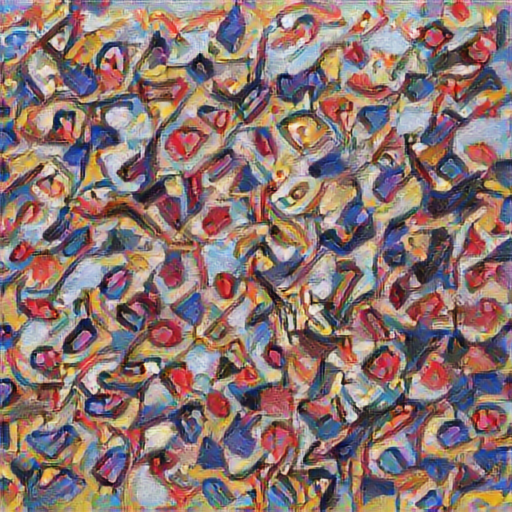

In [24]:
# applying style transfer to our dataset
print(img)
stylized_image = hub_model(tf.constant(img), tf.constant(style_image))[0]
print(stylized_image)
tensor_to_image(stylized_image)


In [25]:
import glob
images = glob.glob("/Users/melody.zhao/Desktop/CS153-Computer-Vision/style_transfer_imgs/*")
output_img = []
for img_path_ in images:
    style_img_ = load_img(img_path_)
    stylized_image_ = hub_model(tf.constant(img), tf.constant(style_img_))[0]
    print(stylized_image_)
    print(tensor_to_image(stylized_image_.numpy()))
    output_img.append(tensor_to_image(stylized_image_))

tf.Tensor(245.0, shape=(), dtype=float32)
tf.Tensor(
[[[[0.26511738 0.23017764 0.27937126]
   [0.2716248  0.2204741  0.26180953]
   [0.3008583  0.25176638 0.28796765]
   ...
   [0.3968673  0.41210976 0.5617547 ]
   [0.4655671  0.48829222 0.63916826]
   [0.4903256  0.4985299  0.63790023]]

  [[0.2699886  0.22861263 0.28272498]
   [0.2752686  0.21889883 0.26365215]
   [0.30095947 0.25069433 0.28507692]
   ...
   [0.4219264  0.43080705 0.5711181 ]
   [0.491913   0.5097521  0.6468773 ]
   [0.5234159  0.525355   0.6509091 ]]

  [[0.26632506 0.22511646 0.27649266]
   [0.26884013 0.21495578 0.254739  ]
   [0.29272306 0.24720678 0.27492535]
   ...
   [0.38689572 0.40683764 0.5290572 ]
   [0.46486086 0.4927258  0.6146432 ]
   [0.50945157 0.5214926  0.62620145]]

  ...

  [[0.38826135 0.30362475 0.3204414 ]
   [0.4356003  0.3324011  0.30201524]
   [0.57460386 0.42426306 0.3976577 ]
   ...
   [0.39790875 0.37968212 0.4684639 ]
   [0.25805908 0.28752145 0.38370103]
   [0.27443123 0.3034845  0.3989

<PIL.Image.Image image mode=RGB size=512x512 at 0x7FB4546AD430>
<PIL.Image.Image image mode=RGB size=512x512 at 0x7FB4469C6580>
<PIL.Image.Image image mode=RGB size=512x512 at 0x7FB4469C6280>


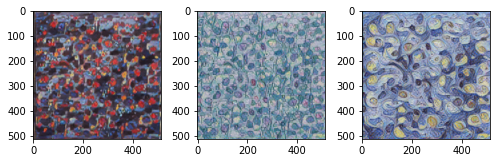

In [40]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
for index, img in enumerate(output_img):
    print(img)
    plt.subplot(1, 3, index+1)
    plt.imshow(img)
    
plt.show()

<PIL.Image.Image image mode=RGB size=512x512 at 0x7FB4546AD430>
(96, 96, 3)


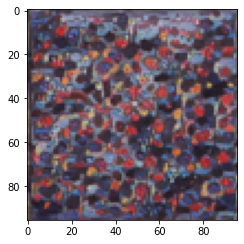

In [43]:
image1 = output_img[0]

print(image1)
image1 = image1.resize((96,96))
plt.imshow(image1)
tf_img1 = tf.keras.preprocessing.image.img_to_array(image1)

print(tf_img1.shape)

In [37]:
transformed_img1 = tf.image.convert_image_dtype(tf_img1, tf.float32)
transformed_img1

<tf.Tensor: shape=(96, 96, 3), dtype=float32, numpy=
array([[[ 73.,  65.,  68.],
        [111., 105., 109.],
        [125., 107., 129.],
        ...,
        [119., 115.,  99.],
        [122., 117., 114.],
        [106., 111., 136.]],

       [[ 67.,  58.,  60.],
        [ 95.,  93.,  97.],
        [ 92.,  96., 137.],
        ...,
        [100., 105., 135.],
        [105., 107., 129.],
        [ 94.,  98., 121.]],

       [[ 72.,  62.,  63.],
        [ 94.,  79.,  90.],
        [ 87.,  92., 132.],
        ...,
        [ 82.,  93., 139.],
        [ 67.,  79.,  97.],
        [ 92.,  90.,  87.]],

       ...,

       [[118.,  86.,  89.],
        [ 79.,  64.,  61.],
        [ 71.,  68.,  76.],
        ...,
        [ 96., 141., 156.],
        [121., 110.,  89.],
        [141., 131., 124.]],

       [[115.,  88.,  83.],
        [ 80.,  67.,  65.],
        [ 69.,  72.,  89.],
        ...,
        [ 65.,  81.,  98.],
        [ 99., 112., 125.],
        [ 99., 111., 133.]],

       [[108.,  82.